In [252]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [221]:
data = pd.read_csv("/content/drive/MyDrive/TrainAI/Datasets/data_final.csv")

In [222]:
# Gán tất cả các phần tử trong DataFrame bằng giá trị NaN
data.replace(to_replace=0, value=np.nan, inplace=True)

In [223]:
# Lưu lại dataset sau khi đã gán giá trị NaN
data.to_csv('dataset_with_nan.csv', index=False)  # Lưu thành tệp CSV mớ

In [224]:
data_final = pd.read_csv('/content/dataset_with_nan.csv')

In [225]:
data_final

,url,host,page_entropy,num_script_tags,script_to_body_ratio,html_length,page_tokens,num_sentences,num_punctuations,distinct_tokens,...,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,dns_record,page_rank,label
0,http://caixa.gov.br/empresa/credito-financiame...,200.201.165.253,5.048844,59.0,0.089609,175618,5542,982,10792.0,2140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,normal
1,http://anandtech.com/show/9199/lg-announces-th...,18.66.97.83,4.655234,20.0,0.200274,80235,5602,740,7677.0,2442,...,NaN,NaN,NaN,NaN,1.0,NaN,155.0,NaN,6.0,normal
2,http://ap.org/Content/Press-Release/2013/AP-an...,23.42.164.175,4.889102,27.0,0.069433,43956,3151,359,5440.0,1555,...,NaN,NaN,NaN,1.0,1.0,NaN,1952.0,NaN,6.0,normal
3,http://ap.org/Content/AP-In-The-News/2014/AP-n...,23.42.164.175,4.890379,27.0,0.083729,36451,2109,292,5134.0,1039,...,NaN,NaN,NaN,1.0,1.0,NaN,1952.0,NaN,6.0,normal
4,http://mylust.com/videos/226488/stunning-young...,172.67.152.14,4.683243,32.0,0.126247,84596,4530,641,7958.0,1757,...,NaN,NaN,NaN,NaN,NaN,NaN,608.0,NaN,4.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064,https://coupon.santanderconsumer.at/,184.87.235.231,4.871272,4.0,0.196134,10605,547,107,1277.0,369,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,4.0,phishing
2065,https://www.orange-business.com/fr/infographie...,23.41.76.202,4.479783,58.0,0.035996,220332,11182,999,23776.0,1845,...,NaN,NaN,NaN,1.0,1.0,NaN,222.0,NaN,5.0,phishing
2066,https://ov-berlin-tempelhof-schoeneberg.thw.de/,195.201.44.119,4.970670,4.0,0.000100,30075,1627,152,2795.0,756,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,5.0,phishing
2067,https://santander.b4.wrvc.co.uk/,54.194.70.9,5.200044,3.0,0.926881,24973,1716,1175,4894.0,713,...,NaN,NaN,NaN,1.0,NaN,NaN,318.0,NaN,2.0,phishing


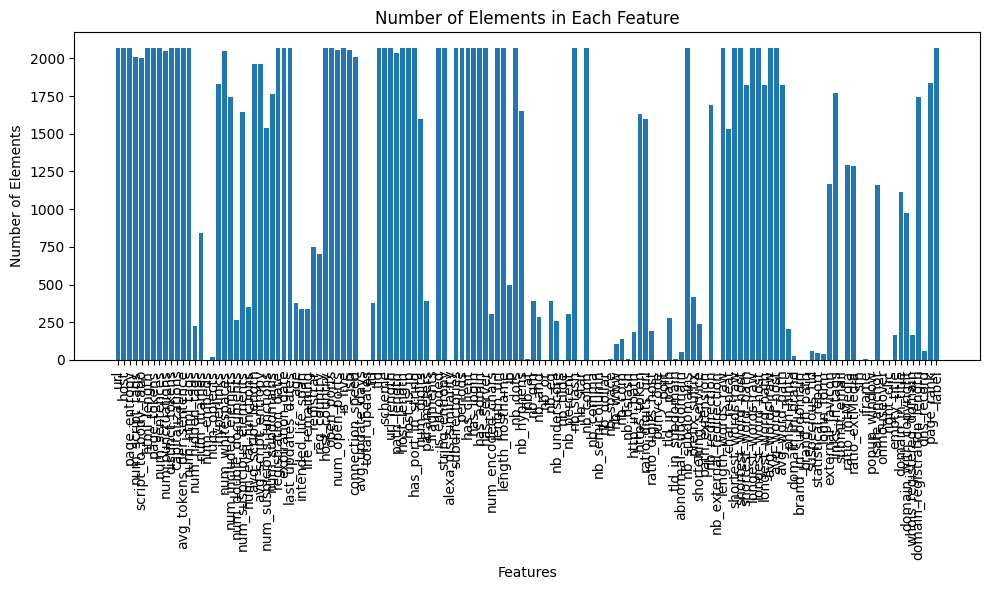

In [226]:
import matplotlib.pyplot as plt

# Tính số lượng phần tử trong mỗi feature
feature_counts = data_final.count()

# Tạo biểu đồ bar chart
plt.figure(figsize=(10, 6))
plt.bar(feature_counts.index, feature_counts.values)
plt.xlabel('Features')
plt.ylabel('Number of Elements')
plt.title('Number of Elements in Each Feature')
plt.xticks(rotation=90)  # Để xác nhận rằng tên features không bị trùng nhau trên trục x
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

In [227]:
x = data_final.drop('label', axis = 1)
y = data_final['label']

In [228]:
numeric_features = x.select_dtypes(include = ["int", "float"]).columns
categorical_features = x.select_dtypes(include = ["object", "bool"]).columns

In [229]:
numeric_transform = Pipeline(steps = [
    ('imputer', KNNImputer(n_neighbors = 5)),
    ('scaler', StandardScaler())
])

In [230]:
categorical_transform = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('encoder', OneHotEncoder())
])

In [231]:
preprocessor = ColumnTransformer(transformers = [
    ('numeric', numeric_transform, numeric_features),
    ('cat', categorical_transform, categorical_features)
])

In [232]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state=42)

In [233]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [234]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['page_entropy', 'num_script_tags', 'script_to_body_ratio',
       'html_length', 'page_tokens', 'num_sentences', 'num_punctuations',
       'distinct_tokens', 'capitalizations', 'avg_tokens_per_sentence',
       ...
       'safe_anchor'...
                                                                   OneHotEncoder())]),
                                                  Index(['url', 'host', 'registration_date', 'expiration_date',
       'last_updates_dates', 'registrar', 'reg_country', 'host_country',
       'open_ports', 'is_live', 'isp', 'tld', 'scheme', 'host_is_ip',
       'has_port_in_string', 'is_encoded', 'has_client', 'has_login',
       'has_admin', 'has_server'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [235]:
X_transformed = preprocessor.fit_transform(x)

In [236]:
pd.DataFrame(X_transformed).head(10)

,0
0,"(0, 0)\t-0.09148409429561528\n (0, 1)\t1.09..."
1,"(0, 0)\t-0.803541678849914\n (0, 1)\t-0.302..."
2,"(0, 0)\t-0.3804639121299405\n (0, 1)\t-0.05..."
3,"(0, 0)\t-0.37815438345784647\n (0, 1)\t-0.0..."
4,"(0, 0)\t-0.752871890563227\n (0, 1)\t0.1290..."
5,"(0, 0)\t0.5067329526711472\n (0, 1)\t-0.697..."
6,"(0, 0)\t-0.3906623038533349\n (0, 1)\t-0.05..."
7,"(0, 0)\t-0.3705495272046184\n (0, 1)\t-0.05..."
8,"(0, 0)\t0.4708117324010174\n (0, 1)\t-0.302..."
9,"(0, 0)\t-0.3898366176712185\n (0, 1)\t-0.05..."


In [237]:
pip install -U imbalanced-learn


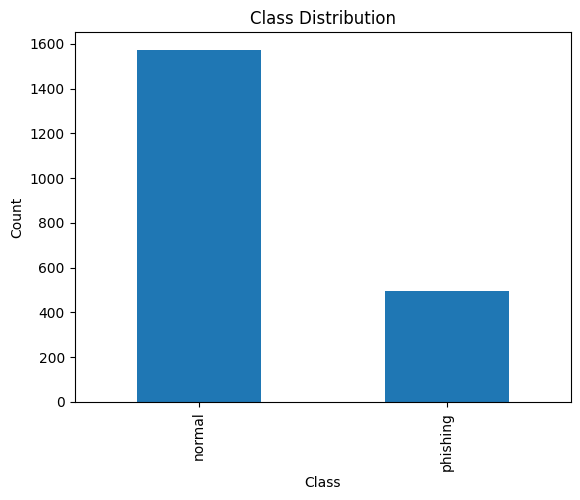

In [238]:
# Kiểm tra sự mất cân bằng trong cột mục tiêu thông qua biểu đồ bar
def plot_class_balance(y):
    class_counts = y.value_counts()
    class_counts.plot(kind='bar')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Class Distribution')
    plt.show()

plot_class_balance(y)

In [240]:
#Khong imbalanced
pipeline.fit(x, y)
y_pred = pipeline.predict(xtest)

In [241]:
#Hieu suat ban dau cua mo hinh
accuracy_original = accuracy_score(ytest, y_pred)
recall_original = recall_score(ytest, y_pred, pos_label='normal')
f1_original = f1_score(ytest, y_pred, pos_label='normal')

In [242]:
# Tạo pipeline với xử lý mất cân bằng sử dụng SMOTE
smote_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),  # Xử lý mất cân bằng bằng SMOTE
    ('classifier', RandomForestClassifier(random_state=42))
])

In [243]:
smote_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['page_entropy', 'num_script_tags', 'script_to_body_ratio',
       'html_length', 'page_tokens', 'num_sentences', 'num_punctuations',
       'distinct_tokens', 'capitalizations', 'avg_tokens_per_sentence',
       ...
       'safe_anchor'...
                                                  Index(['url', 'host', 'registration_date', 'expiration_date',
       'last_updates_dates', 'registrar', 'reg_country', 'host_country',
       'open_ports', 'is_live', 'isp', 'tld', 'scheme', 'host_is_ip',
       'has_port_in_string', 'is_encoded', 'has_client', 'has_login',
       'has_admin', 'has_server'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [244]:
smote_pipeline.fit(x, y)
y_pred_smote = smote_pipeline.predict(xtest)

In [245]:
# Hiệu suất của mô hình sau xử lý mất cân bằng bằng SMOTE
accuracy_smote = accuracy_score(ytest, y_pred_smote)
recall_smote = recall_score(ytest, y_pred_smote, pos_label='normal')
f1_smote = f1_score(ytest, y_pred_smote, pos_label='normal')

In [246]:
# Tạo pipeline với xử lý mất cân bằng sử dụng SMOTEENN
smoteenn_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smoteenn', SMOTEENN(random_state=42)),  # Xử lý mất cân bằng bằng SMOTEENN
    ('classifier', RandomForestClassifier(random_state=42))
])


In [247]:
smoteenn_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['page_entropy', 'num_script_tags', 'script_to_body_ratio',
       'html_length', 'page_tokens', 'num_sentences', 'num_punctuations',
       'distinct_tokens', 'capitalizations', 'avg_tokens_per_sentence',
       ...
       'safe_anchor'...
                                                  Index(['url', 'host', 'registration_date', 'expiration_date',
       'last_updates_dates', 'registrar', 'reg_country', 'host_country',
       'open_ports', 'is_live', 'isp', 'tld', 'scheme', 'host_is_ip',
       'has_port_in_string', 'is_encoded', 'has_client', 'has_login',
       'has_admin', 'has_server'],
      dtype='object'))])),
                ('smoteenn', SMOTEENN(random_state=42)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [248]:
smoteenn_pipeline.fit(x, y)
y_pred_smoteenn = smoteenn_pipeline.predict(xtest)

In [249]:
accuracy_smoteenn = accuracy_score(ytest, y_pred_smoteenn)
recall_smoteenn = recall_score(ytest, y_pred_smoteenn, pos_label='normal')
f1_smoteenn = f1_score(ytest, y_pred_smoteenn, pos_label='normal')

In [250]:
# In báo cáo hiệu suất
report_original = classification_report_imbalanced(ytest, y_pred)
report_smote = classification_report_imbalanced(ytest, y_pred_smote)
report_smoteenn = classification_report_imbalanced(ytest, y_pred_smoteenn)


In [251]:
# Tạo dataframe để lưu kết quả
results = pd.DataFrame({
    'Model': ['Original', 'SMOTE', 'SMOTEENN'],
    'Accuracy': [accuracy_original, accuracy_smote, accuracy_smoteenn],
    'Recall': [recall_original, recall_smote, recall_smoteenn],
    'F1 Score': [f1_original, f1_smote, f1_smoteenn]
})

# In ra bảng kết quả
print(results)

      Model  Accuracy  Recall  F1 Score
0  Original       1.0     1.0       1.0
1     SMOTE       1.0     1.0       1.0
2  SMOTEENN       1.0     1.0       1.0
